#                                            **Loss Given Deafault**
#                                              **IME672 - Group 3**



Problem Description :

Loss given default (LGD) is the amount of money a bank or other financial institution loses when a borrower defaults on a loan. It is a very important parameter in risk models used by the banks to calculate their economic capital and expected losses.

In this project, we aim to predict the loss on an asset(lgd_time) to a bank. In the given dataset we have  multiple parameters which will be used in various models to project this loss.


In [ ]:
#importing the libraries required
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


#Reading Data

In [ ]:
#reading data from csv fil
df =pd.read_csv("https://raw.githubusercontent.com/sareenpriyam/LOSS-GIVEN-DEFAULT/main/lgd%20(1).csv")

In [ ]:
#printing the first 10 rows
df.head(10)

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
0,0.214078,0.698016,0.301984,-0.837866,-0.359514,-0.518701,0,1
1,0.214078,0.780084,0.219916,-1.266157,-0.248354,-0.772477,0,1
2,0.214078,0.702287,0.297713,-0.858212,-0.353413,-0.530989,0,1
3,0.214078,0.753989,0.246011,-1.120001,-0.282378,-0.687096,0,1
4,0.214078,0.802813,0.197187,-1.403967,-0.219634,-0.851711,0,1
5,0.027384,0.992142,0.007858,-4.838383,-0.007889,-2.415462,0,1
6,0.062669,0.999990,0.000010,-11.512915,0.000000,-4.264891,0,0
7,0.226131,0.980666,0.019334,-3.926345,-0.019524,-2.067694,0,1
8,0.007380,0.992049,0.007951,-4.826530,-0.007982,-2.411177,0,1
9,0.062931,0.999990,0.000010,-11.512915,0.000000,-4.264891,0,0


#Dataset Features

In [ ]:
#Shape of the dataset
df.shape

(2545, 8)

The given dataset has 2545 rows(data points) and 8 columns ( attributes).

LTV is a continuous valued numeric attribute.

lgd_time is a numeric attribute with values between 0 and 1.

Recovery_rate is 1 - lgd_time.

y_logistic, Y_probit and lnrr are transformations of the lgd_time varible.

purpose1 is a binary variable which takes value 1 if the loan is for renting purposes and for other purposes 0.

event is also a binary variable which is 1 when the borrower defaults the loan and else 0

In [ ]:
#Dataset Summary
df.describe()

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
count,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000
mean,0.676556,0.771870,0.228130,-3.941343,-0.996647,-1.650813,0.072692,0.713949
std,0.364127,0.329109,0.329109,6.073280,2.699960,2.304122,0.259681,0.452002
min,0.001359,0.000010,0.000010,-11.512915,-11.512925,-4.264891,0.000000,0.000000
25%,0.399181,0.602146,0.000010,-11.512915,-0.507256,-4.264891,0.000000,0.000000
50%,0.659417,0.967934,0.032066,-3.407383,-0.032591,-1.851268,0.000000,1.000000
75%,0.923548,0.999990,0.397854,-0.414414,0.000000,-0.258905,0.000000,1.000000
max,1.984065,0.999990,0.999990,11.512915,0.000000,4.264891,1.000000,1.000000


In [ ]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTV            2545 non-null   float64
 1   Recovery_rate  2545 non-null   float64
 2   lgd_time       2545 non-null   float64
 3   y_logistic     2545 non-null   float64
 4   lnrr           2545 non-null   float64
 5   Y_probit       2545 non-null   float64
 6   purpose1       2545 non-null   int64  
 7   event          2545 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 159.2 KB


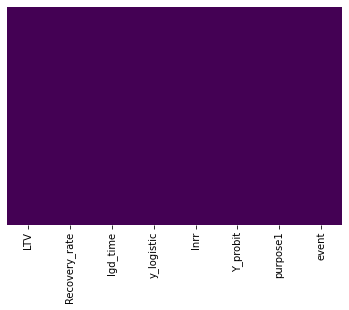

In [ ]:
# Heatmap for null/missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

There are no missing values in the dataset.

In [ ]:
#Checking for LTV and lgd_time

df[['LTV', 'lgd_time']].describe()

,LTV,lgd_time
count,2545.000000,2545.000000
mean,0.676556,0.228130
std,0.364127,0.329109
min,0.001359,0.000010
25%,0.399181,0.000010
50%,0.659417,0.032066
75%,0.923548,0.397854
max,1.984065,0.999990


# Data Visualization

Default:  71.395 % of the dataset
Non-default:  28.605 % of the dataset


Text(0.5, 0, 'Class ( 0:Normal , 1:Default)')

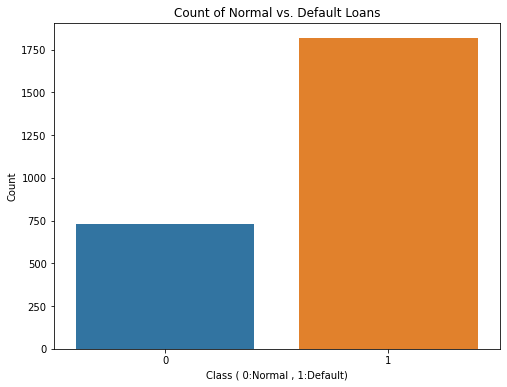

In [ ]:
# Default loans Distribution

print('Default: ', round(df['event'].value_counts()[1]/len(df) * 100,3), '% of the dataset')
print('Non-default: ', round(df['event'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
counts = df.event.value_counts()
Normal = counts[0]
Default = counts[1]
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Normal vs. Default Loans')
plt.ylabel('Count')
plt.xlabel('Class ( 0:Normal , 1:Default)')


 It is clear that for non default loans that the recovery_rate will be 1 hence lgd_time will be 0

In [ ]:
#Creating a dataset "default_loans" which contains the loan details where the amount was defaulted.
default_loans = df[df.event==1]
default_loans.describe()

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.0
mean,0.746421,0.680471,0.319529,-0.907713,-1.395964,-0.603455,0.088608,1.0
std,0.369248,0.350019,0.350019,4.413745,3.107150,1.897446,0.284255,0.0
min,0.001359,0.000010,0.000018,-10.935153,-11.512925,-4.134063,0.000000,1.0
25%,0.468740,0.438010,0.023072,-3.745800,-0.825514,-1.994077,0.000000,1.0
50%,0.752470,0.854781,0.145219,-1.772602,-0.156910,-1.057161,0.000000,1.0
75%,0.979855,0.976928,0.561990,0.249243,-0.023342,0.156017,0.000000,1.0
max,1.984065,0.999982,0.999990,11.512915,-0.000018,4.264891,1.000000,1.0


There are 1817 loans out of 2545 which were defaulted in the given dataset.

Renting:  7.269 % of the dataset
Others:  92.731 % of the dataset


Text(0.5, 0, 'Class ( 0 : Non-rent , 1 : Rent)')

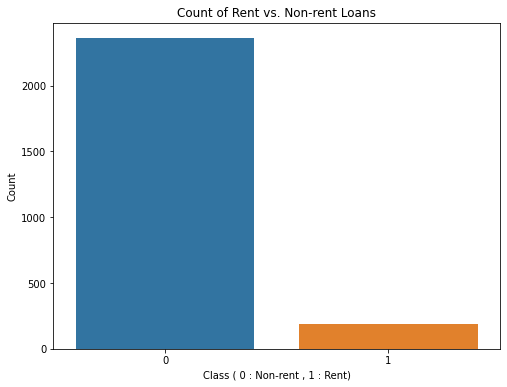

In [ ]:
#Distribution of Purpose in entire dataset 
print('Renting: ', round(df['purpose1'].value_counts()[1]/len(df) * 100,3), '% of the dataset')
print('Others: ', round(df['purpose1'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
counts = df.purpose1.value_counts()
Non_rent = counts[0]
Rent = counts[1]
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Rent vs. Non-rent Loans')
plt.ylabel('Count')
plt.xlabel('Class ( 0 : Non-rent , 1 : Rent)')

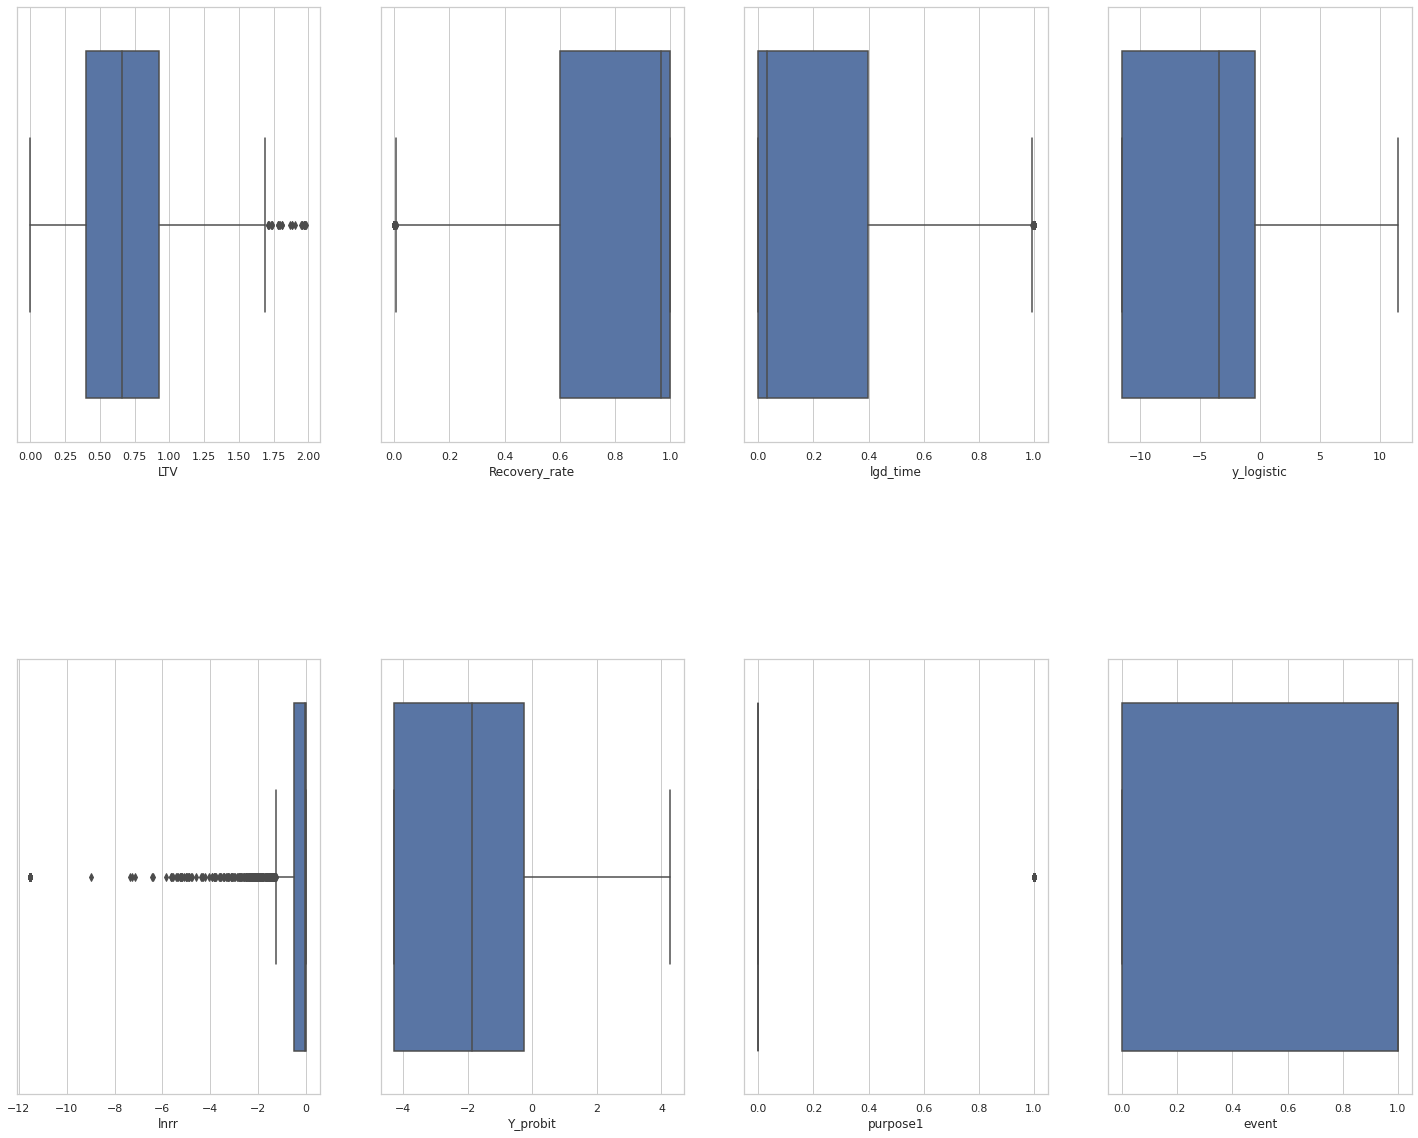

In [ ]:
#Distribution of lgd_time variable in entire dataset
%matplotlib inline


fig, axes = plt.subplots(2, 4, figsize=(25, 20),)
for i,ax in zip(df.columns,axes.flat):
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

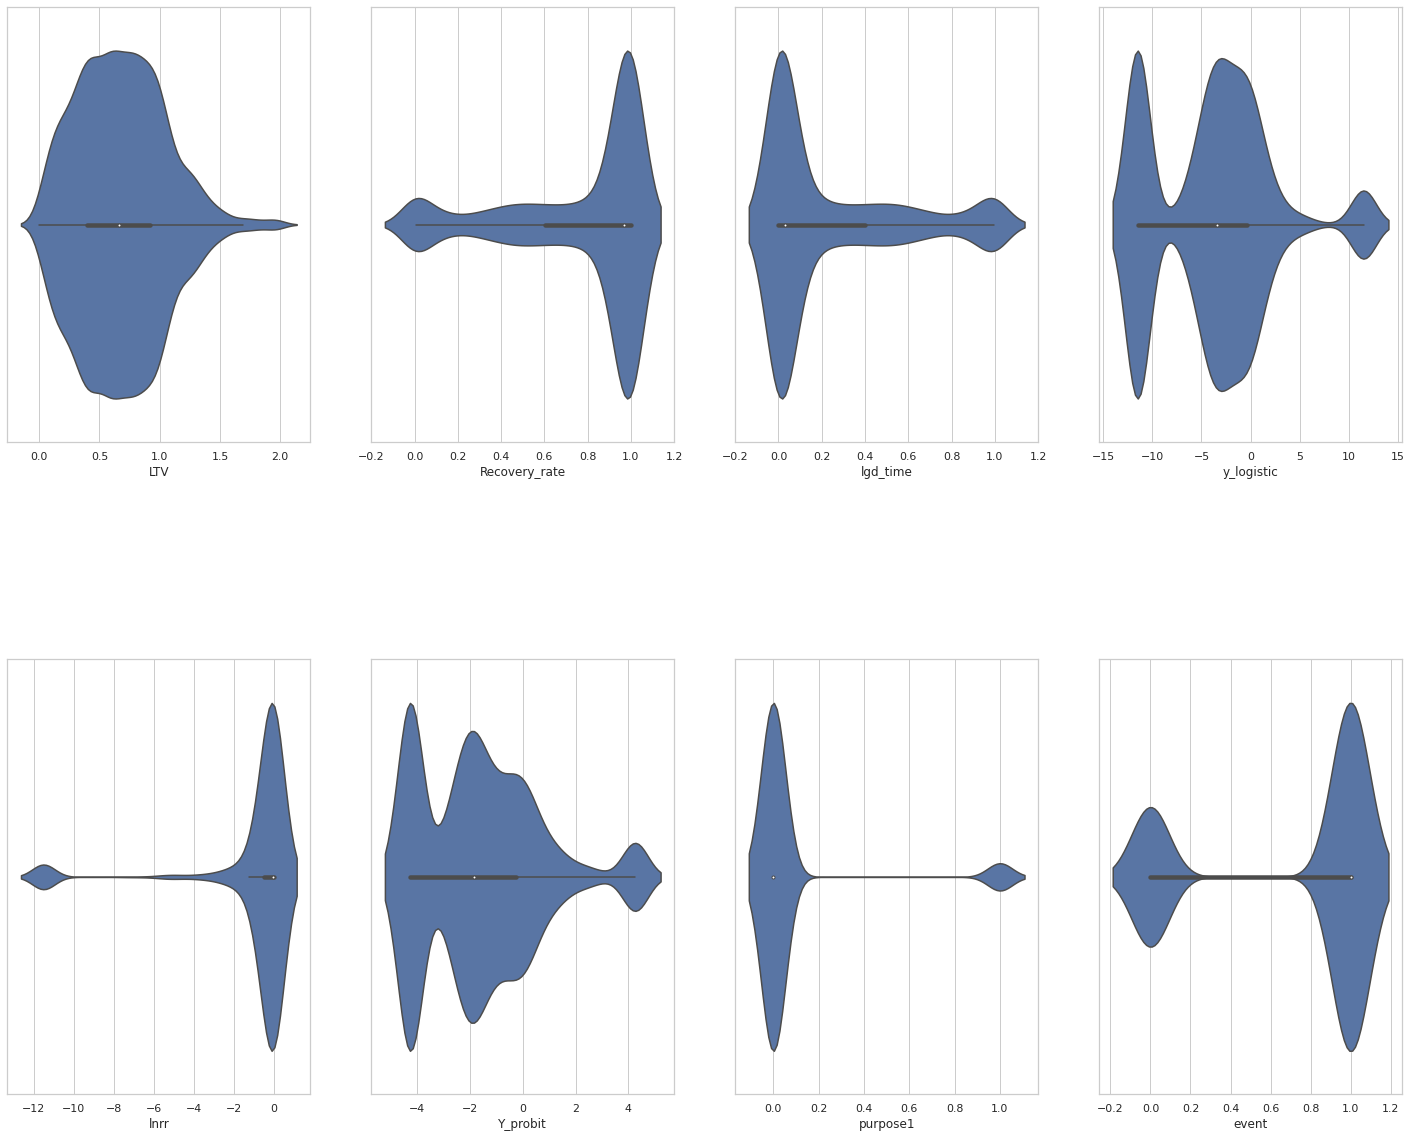

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 20),)
for i,ax in zip(df.columns,axes.flat):
    sns.set(style="whitegrid")
    sns.violinplot(data=df, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

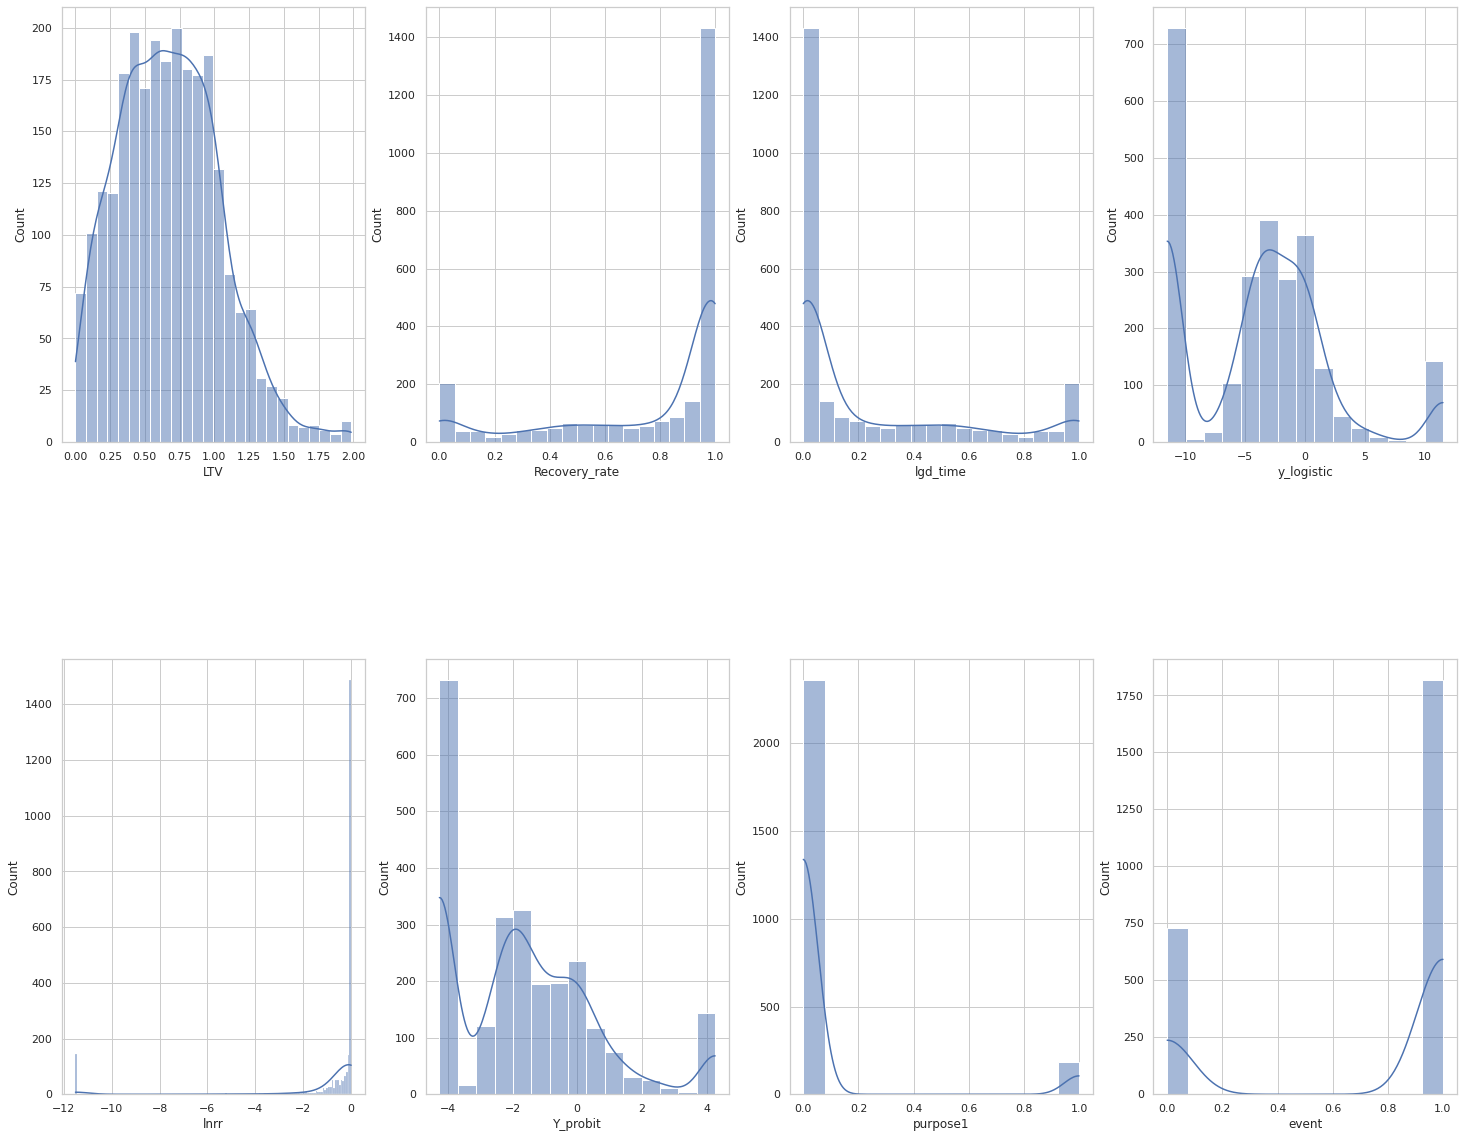

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

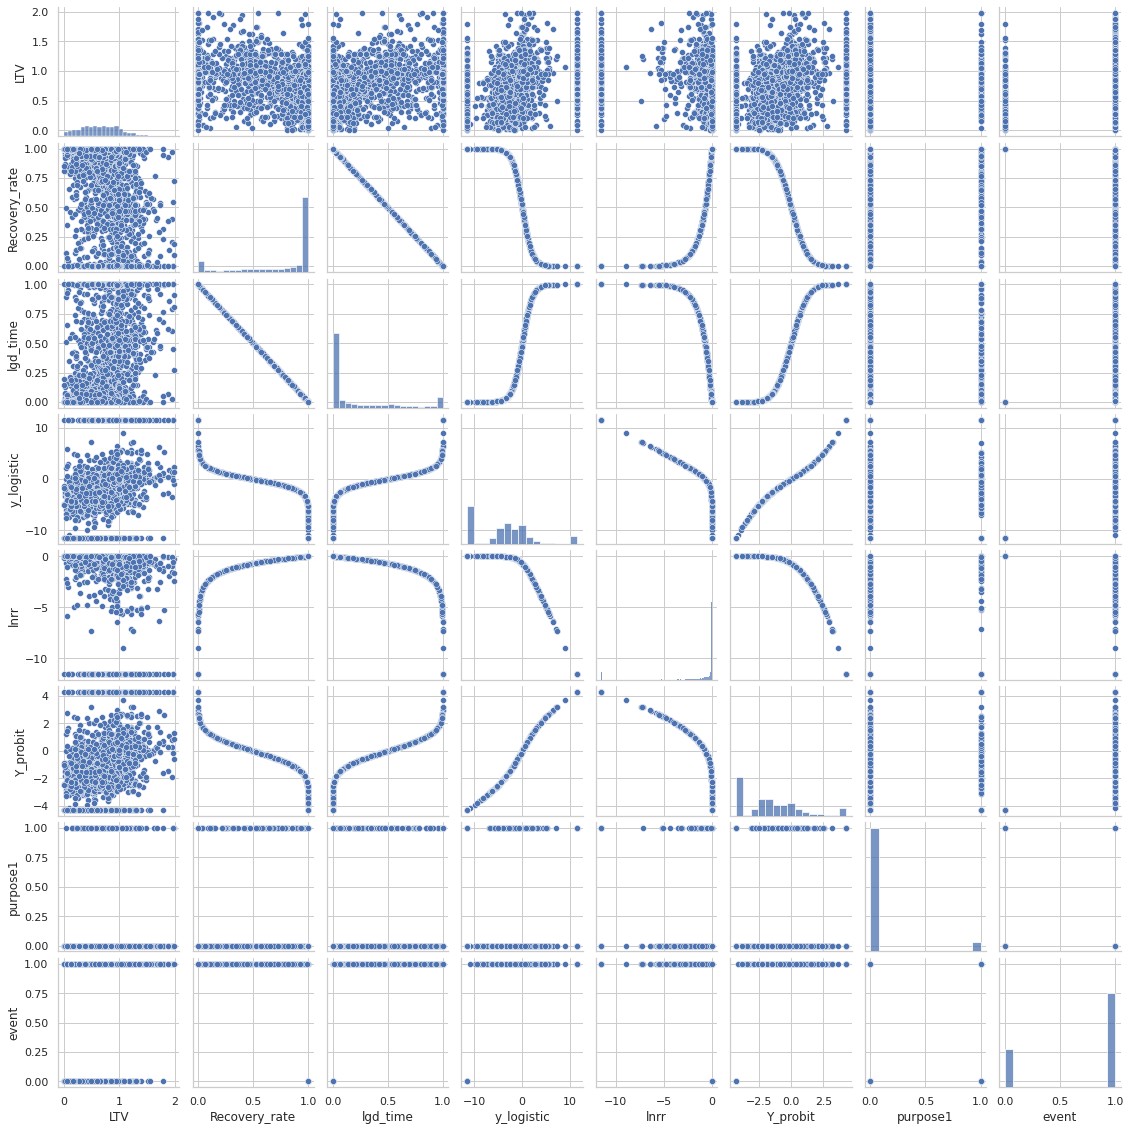

<Figure size 1152x1152 with 0 Axes>

In [ ]:
from IPython.display import Image

sns_plot = sns.pairplot(df, height=2.0)
sns_plot.savefig("pairplot.png")

plt.clf()
Image(filename='pairplot.png')            

Text(0.5, 1.0, 'Amount of normal and rent loans with the distrbution of LTV and lgd_time')

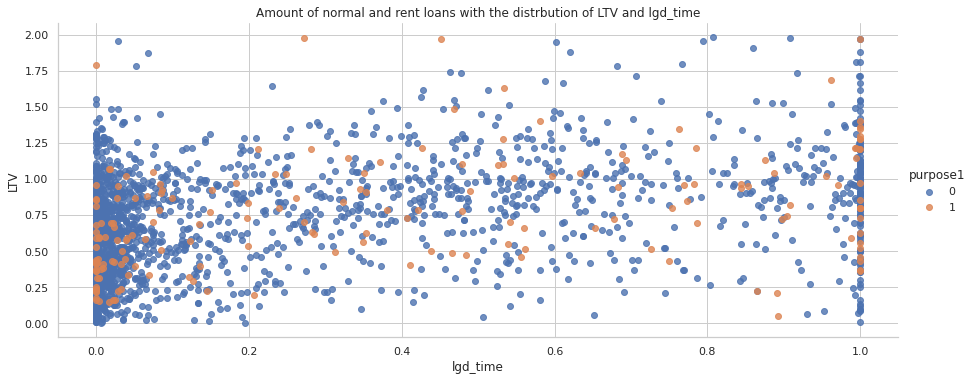

In [ ]:
# Distribution of Loan to value ratio(LTV) vs the lgd_time
ax = sns.lmplot(y="LTV", x="lgd_time", fit_reg=False, aspect=2.5, data=df, hue='purpose1')
plt.title("Amount of normal and rent loans with the distrbution of LTV and lgd_time",fontsize=12)

##Correlation Heat Map

In [ ]:
#Correlation Matrix
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)


                 LTV  Recovery_rate  lgd_time  ...  Y_probit  purpose1  event
LTV            1.000         -0.424     0.424  ...     0.427     0.058  0.303
Recovery_rate -0.424          1.000    -1.000  ...    -0.908    -0.138 -0.439
lgd_time       0.424         -1.000     1.000  ...     0.908     0.138  0.439
y_logistic     0.410         -0.842     0.842  ...     0.990     0.140  0.789
lnrr          -0.252          0.761    -0.761  ...    -0.764    -0.099 -0.234
Y_probit       0.427         -0.908     0.908  ...     1.000     0.144  0.718
purpose1       0.058         -0.138     0.138  ...     0.144     1.000  0.097
event          0.303         -0.439     0.439  ...     0.718     0.097  1.000

[8 rows x 8 columns]


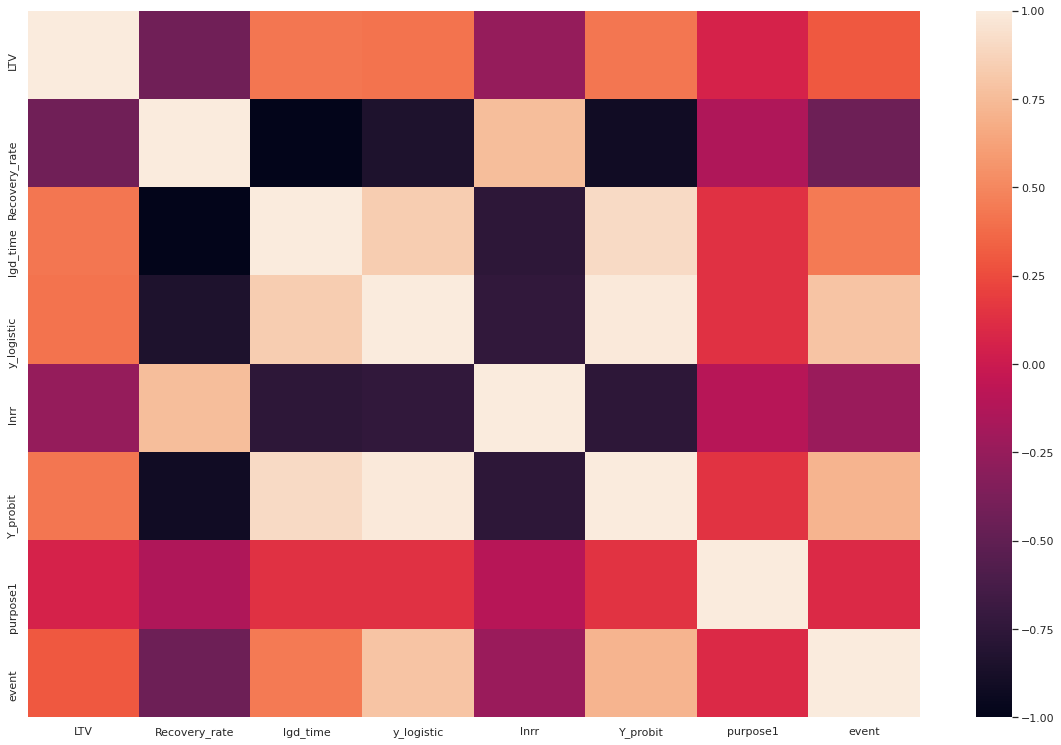

In [ ]:
#Correlation heat map
plt.subplots(figsize=(20,13 ))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)

The variables lgd_time, y_logistic and Y_probit are highly correlated

 Attributes recovery_rate and lnrr are also positively correlated

As expected recovery_rate and lgd_time are negatively correlated as lgd_time = 1 - recovery_rate

In [ ]:
!pip install ppscore
import ppscore as pps
pps.matrix(df)



,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,LTV,LTV,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,LTV,Recovery_rate,0.000000,regression,True,mean absolute error,0.222648,0.235793,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,LTV,lgd_time,0.000000,regression,True,mean absolute error,0.222648,0.235793,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,LTV,y_logistic,0.000000,regression,True,mean absolute error,4.680588,4.929926,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,LTV,lnrr,0.000000,regression,True,mean absolute error,0.991117,1.478543,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
...,...,...,...,...,...,...,...,...,...
59,event,y_logistic,0.528019,regression,True,mean absolute error,4.680588,2.209148,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
60,event,lnrr,0.000000,regression,True,mean absolute error,0.991117,1.345222,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
61,event,Y_probit,0.422501,regression,True,mean absolute error,1.799817,1.039393,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
62,event,purpose1,0.000000,regression,True,mean absolute error,0.072692,0.133712,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


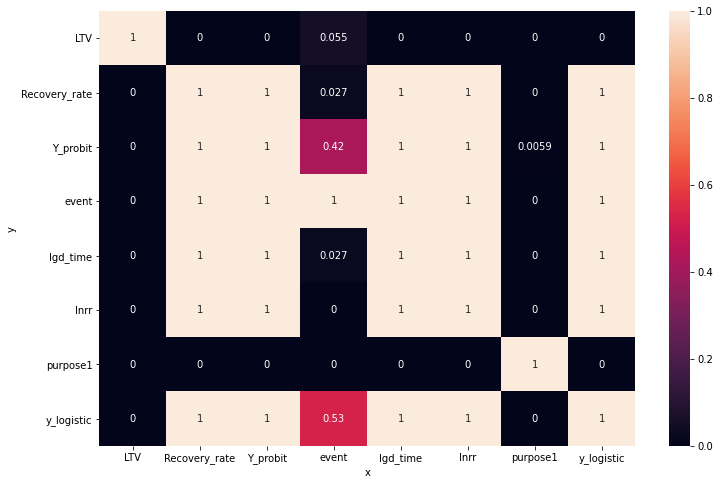

In [ ]:
from matplotlib.pyplot import figure


figure(figsize=(12,8))

a = pps.matrix(df).pivot(columns='x', index='y', values='ppscore')

sns.heatmap(a, annot=True)